# Best Times to Tweets in Healthcare vs. Education

### Read in the csv file

In [2]:
import pandas as pd
df = pd.read_csv(r"E:\OneDrive - University of Georgia\Project\Data\tweet_data_2_food\4.2 LocaTime 1 csv - Copy\fastFood_2019_2021_localTime_stateLevel_4_columns.csv",low_memory=False)
#df

### Convert the "Created At" field into a datetime data type, extract the day of the week, and map it onto a new column called "weekdays"

In [3]:
import datetime

df1 = df.copy()

df1['local_time'] = pd.to_datetime(df1['local_time'])
value = df1['local_time']
        
def weekday(date):
    if date.weekday() == 0:
        return 'Monday'
    elif date.weekday() == 1:
        return 'Tuesday'
    elif date.weekday() == 2:
        return 'Wednesday'
    elif date.weekday() == 3:
        return 'Thursday'
    elif date.weekday() == 4:
        return 'Friday'
    elif date.weekday() == 5:
        return 'Saturday'
    else:
        return 'Sunday'

df1["weekdays"] = value.map(weekday)
df1['weekdays']

0          Thursday
1          Thursday
2          Thursday
3          Thursday
4          Thursday
             ...   
1317795      Monday
1317796      Monday
1317797      Monday
1317798      Monday
1317799      Monday
Name: weekdays, Length: 1317800, dtype: object

### Extract the time and map it onto a new column called "time"

In [4]:
df2 = df1.copy()

def time(date):
    time2 = date.time()
    return time2

df2["time"] = value.map(time)
df2['time']

0          23:24:24
1          23:18:01
2          22:33:15
3          22:32:22
4          22:31:31
             ...   
1317795    19:05:10
1317796    16:04:42
1317797    18:02:57
1317798    18:02:47
1317799    17:00:21
Name: time, Length: 1317800, dtype: object

### Group the times into hourly buckets and map it onto a new column called "time groups"

In [5]:
df3 = df2.copy()

def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '12AM-1AM'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '1AM-2AM'
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '2AM-3AM'
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '3AM-4AM'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '4AM-5AM'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '5AM-6AM'
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '6AM-7AM'
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '7AM-8AM'
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '8AM-9AM'
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '9AM-10AM'
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10AM-11AM'
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11AM-12PM'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12PM-1PM'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '1PM-2PM'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '2PM-3PM'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '3PM-4PM'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '4PM-5PM'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '5PM-6PM'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '6PM-7PM'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '7PM-8PM'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '8PM-9PM'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '9PM-10PM'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '10PM-11PM'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '11PM-12AM'
    else:
        return 'other'

df3["time groups"] = df3['time'].map(time_groups)
df3

,text,lon,lat,local_time,weekdays,time,time groups
0,@DoctorHenryCT Friends don't let friends get c...,-122.295649,37.838550,2022-01-20 23:24:24,Thursday,23:24:24,11PM-12AM
1,Finally hit Seattle’s Starbucks Reserve. It wa...,-122.328289,47.614044,2022-01-20 23:18:01,Thursday,23:18:01,11PM-12AM
2,Thanks for the memories @starbucks. It’s been ...,-122.330602,47.614817,2022-01-20 22:33:15,Thursday,22:33:15,10PM-11PM
3,I am so close to the mcdonald's here I can su...,-119.025163,35.346901,2022-01-20 22:32:22,Thursday,22:32:22,10PM-11PM
4,"Domino's bought $100,000 of local restaurants'...",-122.630908,45.536402,2022-01-20 22:31:31,Thursday,22:31:31,10PM-11PM
...,...,...,...,...,...,...,...
1317795,@aobrien7 @tacobell Always yes,-73.968542,40.780709,2020-01-20 19:05:10,Monday,19:05:10,7PM-8PM
1317796,I’m about to smoke eat Taco Bell and play Mine...,-123.095999,44.631133,2020-01-20 16:04:42,Monday,16:04:42,4PM-5PM
1317797,Like our business? Review us on Google+ and ge...,-87.776914,42.103623,2020-01-20 18:02:57,Monday,18:02:57,6PM-7PM
1317798,Burritos for the arts - what could be better! ...,-88.014413,41.808188,2020-01-20 18:02:47,Monday,18:02:47,6PM-7PM


### Get the value counts of "weekdays"

In [6]:
df3['weekdays'].value_counts()

Thursday     206297
Wednesday    203660
Tuesday      199540
Friday       193242
Monday       184885
Saturday     170776
Sunday       159400
Name: weekdays, dtype: int64

### Get the value counts of "time groups"

In [7]:
df3['time groups'].value_counts()

12PM-1PM     90504
1PM-2PM      85861
11AM-12PM    83096
2PM-3PM      79711
10AM-11AM    78885
6PM-7PM      76314
3PM-4PM      75466
7PM-8PM      74598
5PM-6PM      74198
4PM-5PM      72831
8PM-9PM      72691
9AM-10AM     72558
9PM-10PM     68037
8AM-9AM      62421
10PM-11PM    57300
11PM-12AM    43241
7AM-8AM      41394
12AM-1AM     30013
6AM-7AM      21636
1AM-2AM      18751
2AM-3AM      11870
5AM-6AM      10658
3AM-4AM       8072
4AM-5AM       7041
other          653
Name: time groups, dtype: int64

### Renamed "time groups" to "time_groups" for manipulation purposes later

In [23]:
df4 = df3.copy()
df5 = df4.rename(index=str, columns={"time groups": "time_groups"})
df5

,text,lon,lat,local_time,weekdays,time,time_groups
0,@DoctorHenryCT Friends don't let friends get c...,-122.295649,37.838550,2022-01-20 23:24:24,Thursday,23:24:24,11PM-12AM
1,Finally hit Seattle’s Starbucks Reserve. It wa...,-122.328289,47.614044,2022-01-20 23:18:01,Thursday,23:18:01,11PM-12AM
2,Thanks for the memories @starbucks. It’s been ...,-122.330602,47.614817,2022-01-20 22:33:15,Thursday,22:33:15,10PM-11PM
3,I am so close to the mcdonald's here I can su...,-119.025163,35.346901,2022-01-20 22:32:22,Thursday,22:32:22,10PM-11PM
4,"Domino's bought $100,000 of local restaurants'...",-122.630908,45.536402,2022-01-20 22:31:31,Thursday,22:31:31,10PM-11PM
...,...,...,...,...,...,...,...
1317795,@aobrien7 @tacobell Always yes,-73.968542,40.780709,2020-01-20 19:05:10,Monday,19:05:10,7PM-8PM
1317796,I’m about to smoke eat Taco Bell and play Mine...,-123.095999,44.631133,2020-01-20 16:04:42,Monday,16:04:42,4PM-5PM
1317797,Like our business? Review us on Google+ and ge...,-87.776914,42.103623,2020-01-20 18:02:57,Monday,18:02:57,6PM-7PM
1317798,Burritos for the arts - what could be better! ...,-88.014413,41.808188,2020-01-20 18:02:47,Monday,18:02:47,6PM-7PM


### Define the efficiency scores for the heat map

In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                "Friday", "Saturday", "Sunday"]
time_frames = ["12AM-1AM", "1AM-2AM", "2AM-3AM", "3AM-4AM", "4AM-5AM", 
               "5AM-6AM", "6AM-7AM", "7AM-8AM", "8AM-9AM", "9AM-10AM",
               "10AM-11AM", "11AM-12PM", "12PM-1PM", "1PM-2PM", "2PM-3PM",
               "3PM-4PM", "4PM-5PM", "5PM-6PM", "6PM-7PM", "7PM-8PM",
               "8PM-9PM", "9PM-10PM", "10PM-11PM", "11PM-12AM"]


def hc_efficiency_score(df, day, times):
    array1 = []
    array2=[]
    instance_val = 0
    #for each of the time frames
    for time in times:
        #locate the day of the week and the specific time frame, pull the data
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays", "time_groups"]]
        #If there are no tweets in that time frame
        if m1["time_groups"].count() == 0:
            #instance_val = 0
            #lowest category
            sum1 = 0
        else:
            #Sum the retweets, replies, and favorites and divide by num of tweets
            instance_val =  m1["time_groups"].count()
            array2.append(instance_val)
            #2612.6 7702.799999999999 10392.2 11496.8 14216
            #putting the tweets into categorical buckets
            if  instance_val >=  11497 and instance_val <14217:
                sum1 = 5
            elif instance_val >= 10392 and instance_val < 11497:
                sum1 = 4
            elif instance_val >=  7703 and instance_val <10392:
                sum1 = 3
            elif instance_val >= 2613 and instance_val <7703:
                sum1 = 2
            else:
                sum1 = 1
        
        array1.append(sum1)
        
    #####print(array2)
    return array1

### Heat map for Tweets

[3673, 2259, 1383, 1021, 912, 1511, 2922, 5451, 8149, 9251, 10231, 11229, 12654, 11965, 11234, 10612, 10384, 10961, 11276, 11248, 11004, 10558, 8671, 6235]
[4153, 2370, 1440, 973, 974, 1715, 3471, 6783, 9740, 10715, 11429, 12279, 13813, 12875, 11792, 11452, 11229, 11541, 12061, 11685, 11331, 10539, 8709, 6374]
[4265, 2451, 1422, 1000, 944, 1628, 3542, 6830, 10427, 11417, 11980, 12622, 13860, 13376, 12208, 11607, 11098, 11674, 11876, 11609, 11412, 10673, 9107, 6538]
[4363, 2601, 1670, 1125, 1040, 1706, 3740, 7185, 10483, 11965, 12226, 13025, 14216, 13114, 12465, 11943, 11495, 11660, 11970, 11408, 11102, 10425, 8716, 6545]
[4310, 2630, 1684, 1193, 1053, 1752, 3892, 7390, 10804, 11657, 11970, 12364, 13526, 12729, 11498, 10740, 10261, 10187, 10695, 10379, 9585, 8909, 7781, 6163]
[4602, 3068, 2101, 1276, 1054, 1227, 2232, 4284, 7149, 9604, 11374, 11257, 11749, 11242, 10708, 9733, 9482, 9346, 9291, 9059, 9058, 8460, 7298, 6028]
[4647, 3372, 2170, 1484, 1064, 1119, 1837, 3471, 5669, 7949, 967

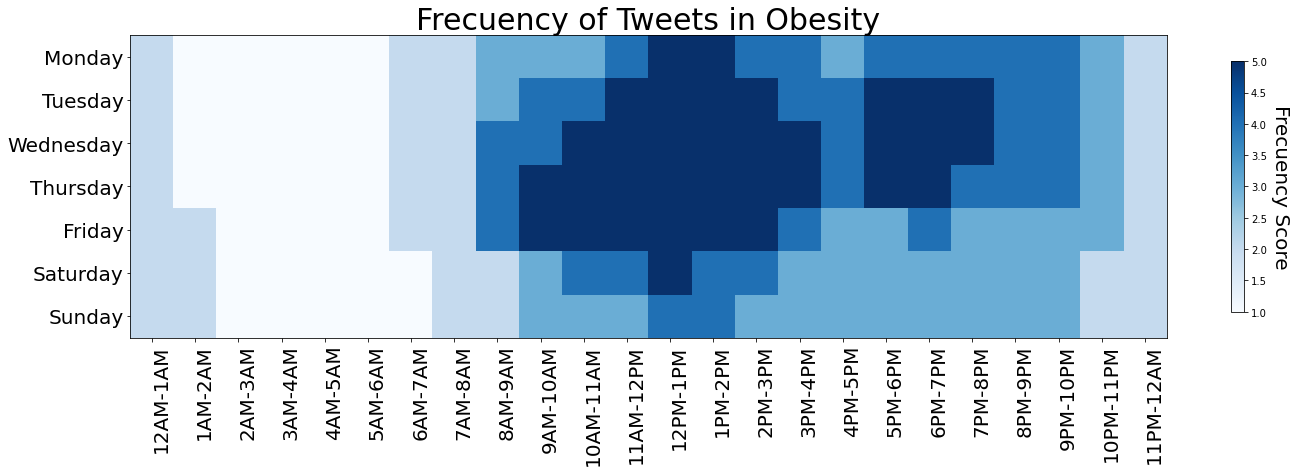

In [48]:
tweet_score = []

m_array = hc_efficiency_score(df5, "Monday", time_frames)
tweet_score.append(m_array)
t_array = hc_efficiency_score(df5, "Tuesday", time_frames)
tweet_score.append(t_array)
w_array = hc_efficiency_score(df5, "Wednesday", time_frames)
tweet_score.append(w_array)
th_array = hc_efficiency_score(df5, "Thursday", time_frames)
tweet_score.append(th_array)
f_array = hc_efficiency_score(df5, "Friday", time_frames)
tweet_score.append(f_array)
st_array = hc_efficiency_score(df5, "Saturday", time_frames)
tweet_score.append(st_array)
s_array = hc_efficiency_score(df5, "Sunday", time_frames)
tweet_score.append(s_array)
print(tweet_score)

fig, ax = plt.subplots(figsize=(20,50))
#(figsize=(width,height))
im = ax.imshow(tweet_score, cmap = cm.Blues)

#get rid of grid lines
ax.grid(False)

#show all ticks...
ax.set_xticks(np.arange(len(time_frames)))
ax.set_yticks(np.arange(len(days_of_week)))
# ... and label them with the respective list entries
ax.set_xticklabels(time_frames, fontsize=20)
ax.set_yticklabels(days_of_week, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

cbarlabel = "Frecuency Score"

cbar = ax.figure.colorbar(im, ax=ax,shrink=0.07)

cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize = 20)

ax.set_title("Frecuency of Tweets in Obesity", fontsize = 30)
fig.tight_layout()
#plt.show()
from PIL import Image
#plt.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

In [46]:
#quantile 
data=[3673, 2259, 1383, 1021, 912, 1511, 2922, 5451, 8149, 9251, 10231, 11229, 12654, 11965, 11234, 10612, 10384, 10961, 11276, 11248, 11004, 10558, 8671, 6235,4153, 2370, 1440, 973, 974, 1715, 3471, 6783, 9740, 10715, 11429, 12279, 13813, 12875, 11792, 11452, 11229, 11541, 12061, 11685, 11331, 10539, 8709, 6374,4265, 2451, 1422, 1000, 944, 1628, 3542, 6830, 10427, 11417, 11980, 12622, 13860, 13376, 12208, 11607, 11098, 11674, 11876, 11609, 11412, 10673, 9107, 6538,4363, 2601, 1670, 1125, 1040, 1706, 3740, 7185, 10483, 11965, 12226, 13025, 14216, 13114, 12465, 11943, 11495, 11660, 11970, 11408, 11102, 10425, 8716, 6545,4310, 2630, 1684, 1193, 1053, 1752, 3892, 7390, 10804, 11657, 11970, 12364, 13526, 12729, 11498, 10740, 10261, 10187, 10695, 10379, 9585, 8909, 7781, 6163,4602, 3068, 2101, 1276, 1054, 1227, 2232, 4284, 7149, 9604, 11374, 11257, 11749, 11242, 10708, 9733, 9482, 9346, 9291, 9059, 9058, 8460, 7298, 6028, 4647, 3372, 2170, 1484, 1064, 1119, 1837, 3471, 5669, 7949, 9675, 10320, 10686, 10560, 9806, 9379, 8882, 8829, 9145, 9210, 9199, 8473, 7018, 5358]
 
quartile_1 = np.quantile(data, 0.20)
quartile_2 = np.quantile(data, 0.4)
quartile_3 = np.quantile(data, 0.6)
quartile_4 = np.quantile(data, 0.8)
quartile_5 = np.quantile(data, 1)

 
print(quartile_1,
      quartile_2,
      quartile_3,
      quartile_4,
      quartile_5)

2612.6 7702.799999999999 10392.2 11496.8 14216


In [ ]:
fig.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

### How many tweets in each timeframe

In [ ]:
tweet_count = []

def tweets(df, day, times):
    array1 = []
    for time in times:
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays","time_groups"]]
        instance_val = m1["time_groups"].count()
        array1.append(instance_val)
    return array1

m_count = tweets(df5, "Monday", time_frames)
print("Monday: ", m_count)
tweet_count.append(m_count)
t_count = tweets(df5, "Tuesday", time_frames)
tweet_count.append(t_count)
print("Tuesday: ", t_count)
w_count = tweets(df5, "Wednesday", time_frames)
tweet_count.append(w_count)
print("Wednesday: ", w_count)
th_count = tweets(df5, "Thursday", time_frames)
tweet_count.append(th_count)
print("Thursday: ", th_count)
f_count = tweets(df5, "Friday", time_frames)
tweet_count.append(f_count)
print("Friday: ", f_count)
st_count = tweets(df5, "Saturday", time_frames)
tweet_count.append(st_count)
print("Saturday: ", st_count)
s_count = tweets(df5, "Sunday", time_frames)
tweet_count.append(s_count)
print("Sunday: ", s_count)